<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logarithmic-Conversion" data-toc-modified-id="Logarithmic-Conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Logarithmic Conversion</a></span></li><li><span><a href="#Imputation" data-toc-modified-id="Imputation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imputation</a></span></li><li><span><a href="#Dates" data-toc-modified-id="Dates-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dates</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Outliers</a></span></li><li><span><a href="#Binning" data-toc-modified-id="Binning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Binning</a></span></li><li><span><a href="#Categorical-to-Numeric" data-toc-modified-id="Categorical-to-Numeric-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Categorical to Numeric</a></span></li><li><span><a href="#Machine-Learning" data-toc-modified-id="Machine-Learning-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Machine Learning</a></span></li></ul></div>

# Feature Engineering Techniques

In [1]:
import numpy as np
import pandas as pd 

dataset_len = 8000
dlen = int(dataset_len/2)
X_11 = pd.Series(np.random.normal(8,2,dlen))
X_12 = pd.Series(np.random.randint(low=0, high=100, size=dlen))
X_1 = pd.concat([X_11, X_12]).reset_index(drop=True)
X_21 = pd.Series(np.random.normal(20,3,dlen))
X_22 = pd.Series(np.random.normal(9,3,dlen))
X_2 = pd.concat([X_21, X_22]).reset_index(drop=True)
X_31 = pd.Series(np.random.normal(8,2,dlen))
X_32 = pd.Series(np.random.randint(low=0, high=300, size=dlen))
X_3 = pd.concat([X_31, X_32]).reset_index(drop=True)
X_4 = pd.Series(np.repeat(['Car', 'Bus', 'Bike', 'Scooter'],
                          dlen/2))
Y = pd.Series(np.repeat(['True','False'],dlen))
df = pd.concat([X_1, X_2, X_3, X_4, Y], axis=1)
df.columns = ['X1', 'X2', 'X3', 'X4', 'Y']
df['X1'] = df['X1'].mask(np.random.random(df['X1'].shape) < 0.22)
df[['X3', 'X4']] = df[['X3', 'X4']].mask(np.random.random(df[['X3', 
                        'X4']].shape) < 0.10)
dates = pd.date_range(start='1/1/2016', periods=len(df), freq='D')
df.insert(loc= 0, column='Date', value= dates)
df.head()

,Date,X1,X2,X3,X4,Y
0,2016-01-01,11.798186,16.299548,9.466762,Car,True
1,2016-01-02,6.705743,14.254479,7.405022,Car,True
2,2016-01-03,5.451097,16.471537,7.440786,Car,True
3,2016-01-04,13.364043,22.021941,NaN,Car,True
4,2016-01-05,NaN,19.937920,7.422658,Car,True


## Logarithmic Conversion

In [2]:
df[['X1', 'X2', 'X3']]=(df[['X1','X2','X3']]-
                        df[['X1','X2','X3']].min()+
                        1).transform(np.log)
df.sample(5)

,Date,X1,X2,X3,X4,Y
2496,2022-11-01,2.482055,3.270268,2.487769,Bus,True
782,2018-02-21,NaN,3.139792,1.970446,Car,True
3449,2025-06-11,NaN,3.176024,2.672777,Bus,True
148,2016-05-28,2.350232,3.434115,2.216226,Car,True
7505,2036-07-19,NaN,2.248421,NaN,Scooter,False


## Imputation

In [3]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'NaNs percentage': percent_missing})
missing_values.sort_values(by ='NaNs percentage' , ascending=False)

,NaNs percentage
X1,21.8000
X4,10.4625
X3,9.5875
Date,0.0000
X2,0.0000
Y,0.0000


In [4]:
# Drop Column if at least 20% of it's elements are Nans
df = df.loc[:, df.isnull().sum() < 0.2*df.shape[0]]

percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'NaNs percentage': percent_missing})
missing_values.sort_values(by ='NaNs percentage' , ascending=False)

,NaNs percentage
X4,10.4625
X3,9.5875
Date,0.0000
X2,0.0000
Y,0.0000


In [5]:
# Using Mean to fill NaNs
#for i in range(0, len(df.columns)):
for i in range(1, 3):
    df.iloc[:,i].fillna(df.iloc[:,i].median(), inplace=True)
    
df['X4'].fillna(df['X4'].value_counts().idxmax(), inplace=True)
    
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'NaNs percentage': percent_missing})
missing_values.sort_values(by ='NaNs percentage' , ascending=False)

,NaNs percentage
Date,0.0
X2,0.0
X3,0.0
X4,0.0
Y,0.0


In [6]:
# # Categorical Data
# df['X4'].fillna(df['X4'].value_counts().idxmax(), inplace=True)

# percent_missing = df.isnull().sum() * 100 / len(df)
# missing_values = pd.DataFrame({'NaNs percentage': percent_missing})
# missing_values.sort_values(by ='NaNs percentage' , ascending=False)

In [7]:
#Filling all missing values with 0
df = df.fillna(0)

percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'NaNs percentage': percent_missing})
missing_values.sort_values(by ='NaNs percentage' , ascending=False)

,NaNs percentage
Date,0.0
X2,0.0
X3,0.0
X4,0.0
Y,0.0


## Dates

In [8]:
#Extracting Year
df['year'] = df['Date'].dt.year

#Extracting Month
df['month'] = df['Date'].dt.month

#Extracting the weekday name of the date
df['day'] = df['Date'].dt.day #_name()

df.head()

,Date,X2,X3,X4,Y,year,month,day
0,2016-01-01,2.948228,2.348205,Car,True,2016,1,1
1,2016-01-02,2.834804,2.128829,Car,True,2016,1,2
2,2016-01-03,2.957205,2.133075,Car,True,2016,1,3
3,2016-01-04,3.210623,2.520078,Car,True,2016,1,4
4,2016-01-05,3.122827,2.130925,Car,True,2016,1,5


## Outliers

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(df['X2'], df['X3'])
plt.xlabel('X2')
plt.ylabel('X3')
plt.show()

<Figure size 640x480 with 1 Axes>

(array([1.000e+00, 1.000e+00, 3.000e+00, 1.800e+01, 7.100e+01, 3.730e+02,
        1.369e+03, 1.970e+03, 2.372e+03, 1.822e+03]),
 array([0.        , 0.34921698, 0.69843395, 1.04765093, 1.39686791,
        1.74608488, 2.09530186, 2.44451883, 2.79373581, 3.14295279,
        3.49216976]),
 <a list of 10 Patch objects>)

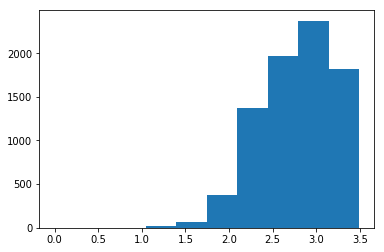

In [10]:
plt.hist(df['X2'])

(array([   8.,   34.,  170., 2249., 2128.,  161.,  260.,  442.,  956.,
        1592.]),
 array([0.        , 0.57037825, 1.14075649, 1.71113474, 2.28151299,
        2.85189124, 3.42226948, 3.99264773, 4.56302598, 5.13340423,
        5.70378247]),
 <a list of 10 Patch objects>)

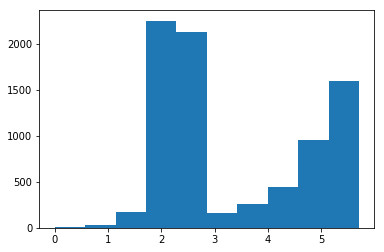

In [11]:
plt.hist(df['X3'])

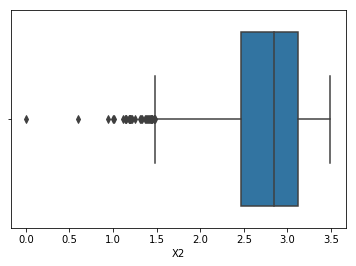

In [12]:
sns.boxplot(x=df["X2"])

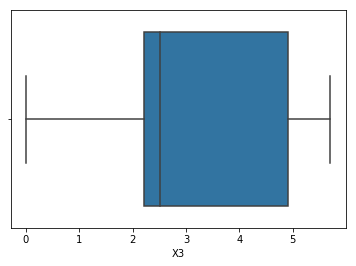

In [13]:
sns.boxplot(x=df["X3"])

In [14]:
print(len(df))
UpperLimit = df['X2'].mean() + df['X2'].std() * 2
LowerLimit = df['X2'].mean() - df['X2'].std() * 2
df2 = df[(df['X2'] < UpperLimit) & (df['X2'] > LowerLimit)]
print(len(df2))
UpperLim = df['X3'].mean() + df['X3'].std() * 2
LowerLim = df['X3'].mean() - df['X3'].std() * 2
df3 = df[(df['X3'] < UpperLim) & (df['X3'] > LowerLim)]
print(len(df3))

8000
7772
7992


In [15]:
upper_lim = df['X2'].quantile(0.95)
lower_lim = df['X2'].quantile(0.05)
df4 = df[(df['X2'] < upper_lim) & (df['X2'] > lower_lim)]
print(len(df4))

7200


## Binning

In [16]:
df['Vehicle Type'] = np.select([df.X4 == 'Car',df.X4 == 'Bus', df.X4 == 'Bike', 
                                df.X4 == 'Scooter'], 
                               ['Electric', 'Electric', 'Not-Electric', 
                                'Not-Electric'], 
                               default='Not Classified')
df.sample(5)

,Date,X2,X3,X4,Y,year,month,day,Vehicle Type
7542,2036-08-25,2.774173,1.945910,Scooter,False,2036,8,25,Not-Electric
3169,2024-09-04,3.221740,2.295220,Bus,True,2024,9,4,Electric
4115,2027-04-08,2.236809,1.609438,Bike,False,2027,4,8,Not-Electric
409,2017-02-13,3.331089,2.277378,Car,True,2017,2,13,Electric
649,2017-10-11,3.051198,2.244066,Car,True,2017,10,11,Electric


In [17]:
df['Ranges'] = pd.cut(df.X3, bins = [0, 100, 200, 300], labels=["Low", "Medium", "High"])
df.sample(5)

,Date,X2,X3,X4,Y,year,month,day,Vehicle Type,Ranges
2868,2023-11-08,3.279778,2.163157,Bus,True,2023,11,8,Electric,Low
7198,2035-09-16,2.588728,5.257495,Scooter,False,2035,9,16,Not-Electric,Low
7762,2037-04-02,1.198750,5.135798,Car,False,2037,4,2,Electric,Low
2154,2021-11-24,3.134821,1.906211,Bus,True,2021,11,24,Electric,Low
7771,2037-04-11,2.563426,5.327876,Scooter,False,2037,4,11,Not-Electric,Low


## Categorical to Numeric

In [18]:
X = df.drop(['Y', 'Date'], axis = 1)
Y = df['Y']

In [19]:
X = pd.get_dummies(X, prefix_sep='_')
X.head()

,X2,X3,year,month,day,X4_Bike,X4_Bus,X4_Car,X4_Scooter,Vehicle Type_Electric,Vehicle Type_Not-Electric,Ranges_Low,Ranges_Medium,Ranges_High
0,2.948228,2.348205,2016,1,1,0,0,1,0,1,0,1,0,0
1,2.834804,2.128829,2016,1,2,0,0,1,0,1,0,1,0,0
2,2.957205,2.133075,2016,1,3,0,0,1,0,1,0,1,0,0
3,3.210623,2.520078,2016,1,4,0,0,1,0,1,0,1,0,0
4,3.122827,2.130925,2016,1,5,0,0,1,0,1,0,1,0,0


In [20]:
from sklearn.preprocessing import LabelEncoder

Y = LabelEncoder().fit_transform(Y)
#np.set_printoptions(threshold=np.inf)
Y

array([1, 1, 1, ..., 0, 0, 0])

## Machine Learning

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import time

X = StandardScaler().fit_transform(X)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 101)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [22]:
start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)
print(time.process_time() - start)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

1.25
[[1204    0]
 [   0 1196]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1204
           1       1.00      1.00      1.00      1196

   micro avg       1.00      1.00      1.00      2400
   macro avg       1.00      1.00      1.00      2400
weighted avg       1.00      1.00      1.00      2400

